<a href="https://colab.research.google.com/github/sonicfsw/Check_ULP-R-_722-1/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import sklearn

# KNN для регрессии

## Скачиваем данные



In [ ]:
!kaggle datasets download -d mirichoi0218/insurance
!unzip insurance.zip

Dataset URL: https://www.kaggle.com/datasets/mirichoi0218/insurance
License(s): DbCL-1.0
insurance.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  insurance.zip
replace insurance.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
df = pd.read_csv('insurance.csv')

## Кодируем данные

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe_gender = OneHotEncoder(sparse_output = False)

gender_df = pd.DataFrame(ohe_gender.fit_transform(df[['sex']]))
gender_df.columns = ohe_gender.get_feature_names_out()

# объединяем датафреймы
df = df.join(gender_df.set_index(df.index))

# удаляем исходный столбец
df.drop('sex', axis = 1, inplace = True)
df.head()

,age,bmi,children,smoker,region,charges,sex_female,sex_male
0,19,27.900,0,yes,southwest,16884.92400,1.0,0.0
1,18,33.770,1,no,southeast,1725.55230,0.0,1.0
2,28,33.000,3,no,southeast,4449.46200,0.0,1.0
3,33,22.705,0,no,northwest,21984.47061,0.0,1.0
4,32,28.880,0,no,northwest,3866.85520,0.0,1.0


In [ ]:
ohe_smoker = OneHotEncoder(sparse_output = False)

smoker_df = pd.DataFrame(ohe_smoker.fit_transform(df[['smoker']]))
smoker_df.columns = ohe_smoker.get_feature_names_out()

# объединяем датафреймы
df = df.join(smoker_df.set_index(df.index))

# удаляем исходный столбец
df.drop('smoker', axis = 1, inplace = True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder_region = LabelEncoder()

df['region'] = encoder_region.fit_transform(df['region'])
df

,age,bmi,children,region,charges,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,3,16884.92400,1.0,0.0,0.0,1.0
1,18,33.770,1,2,1725.55230,0.0,1.0,1.0,0.0
2,28,33.000,3,2,4449.46200,0.0,1.0,1.0,0.0
3,33,22.705,0,1,21984.47061,0.0,1.0,1.0,0.0
4,32,28.880,0,1,3866.85520,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,10600.54830,0.0,1.0,1.0,0.0
1334,18,31.920,0,0,2205.98080,1.0,0.0,1.0,0.0
1335,18,36.850,0,2,1629.83350,1.0,0.0,1.0,0.0
1336,21,25.800,0,3,2007.94500,1.0,0.0,1.0,0.0


## Подготавливаем выборки

In [ ]:
X = df.drop('charges', axis = 1)
y = df[['charges']].copy()

In [ ]:
from sklearn.model_selection import train_test_split

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Непосредственно обучение и тестирование модели

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt

In [ ]:
def model_train_test(X_train, y_train, X_test, y_test, model):
  """Обучение и тестирование модели на обучающей и тестовой выборке соответственно.

  :param X_train: объекты обучающей выборки
  :param y_train: значения целевой переменной обучающей выборки
  :param X_test: объекты тестовой выборки
  :param y_test: значения целевой переменной тестовой выборки
  :param model: модель, которая обучается и тестируется
  """
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  mse = mean_squared_error(y_test, pred)
  rmse = sqrt(mse)
  r2 = r2_score(y_test, pred)
  mae = mean_absolute_error(y_test, pred)
  print(f"MSE = {round(mse, 3)}; RMSE = {rmse}; R2 = {round(r2, 3)}; MAE = {round(mae, 3)}")

  return pred, mse, rmse, r2, mae, model

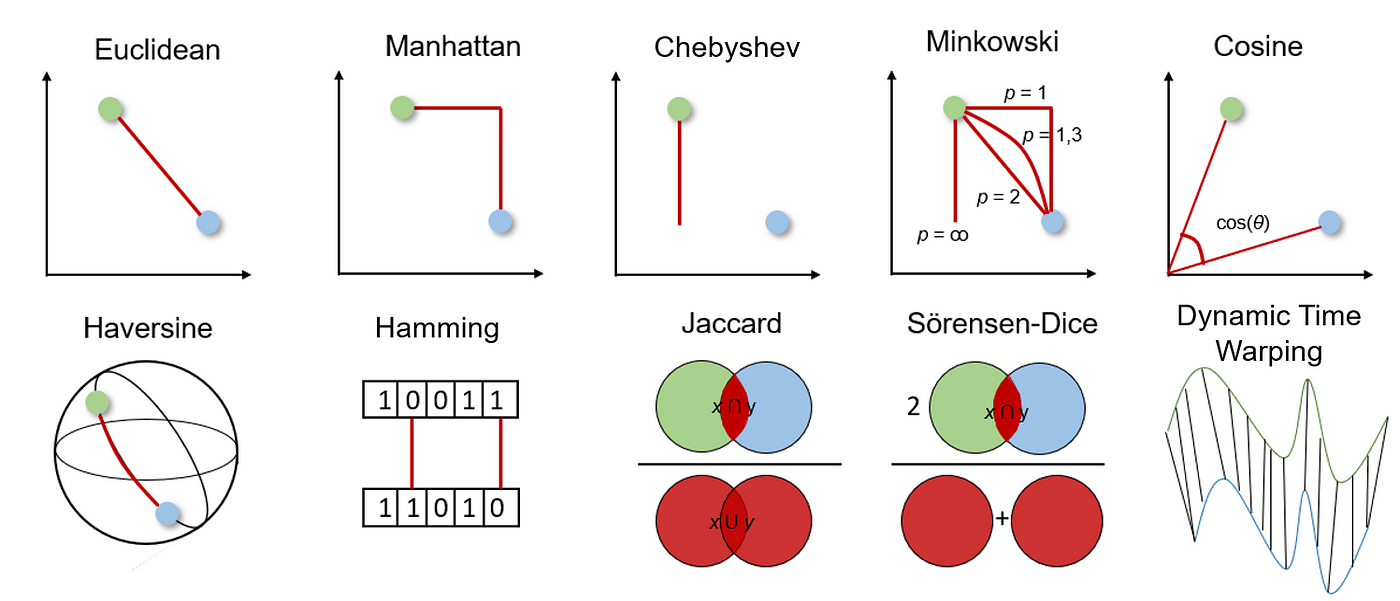

### В качестве метрики расстояния - расстояние Манхэттенское

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_manhattan = KNeighborsRegressor(metric="manhattan")

In [ ]:
pred_knn_m, mse_knn_m, rmse_knn_m, r2_knn_m, mae_knn_m, knn_manhattan = model_train_test(
    X_train_scaled,
    y_train,
    X_test_scaled,
    y_test,
    knn_manhattan
)

MSE = 26825598.007; RMSE = 5179.3433953786725; R2 = 0.827; MAE = 3175.03


### В качестве метрики расстояния - расстояние Евклидово

In [ ]:
knn_euclidean = KNeighborsRegressor(metric = 'euclidean')

In [ ]:
pred_knn_e, mse_knn_e, rmse_knn_e, r2_knn_e, mae_knn_e, knn_euclidean = model_train_test(
    X_train_scaled,
    y_train,
    X_test_scaled,
    y_test,
    knn_euclidean
)

MSE = 25690352.931; RMSE = 5068.565174773115; R2 = 0.835; MAE = 3045.707


### В качестве метрики расстояния - косинусная мера

In [ ]:
knn_cosine = KNeighborsRegressor(metric = 'cosine')

In [ ]:
pred_knn_c, mse_knn_c, rmse_knn_c, r2_knn_c, mae_knn_c, knn_cosine = model_train_test(
    X_train_scaled,
    y_train,
    X_test_scaled,
    y_test,
    knn_cosine
)

MSE = 25242158.039; RMSE = 5024.157445717663; R2 = 0.837; MAE = 2969.8


## Визуализация ошибок

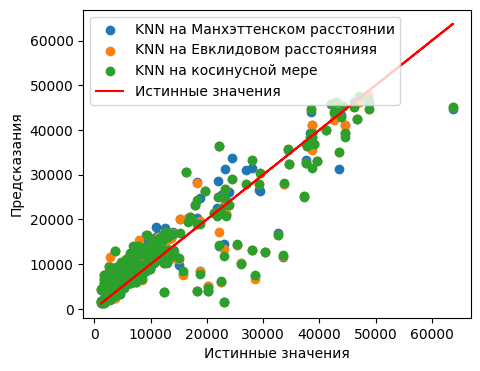

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', size=10)

plt.figure(figsize=(5, 4))

plt.scatter(y_test, pred_knn_m, label="KNN на Манхэттенском расстоянии")
plt.scatter(y_test, pred_knn_e, label="KNN на Евклидовом расстоянияя")
plt.scatter(y_test, pred_knn_c, label="KNN на косинусной мере")

plt.plot(y_test, y_test, label="Истинные значения", color="red")
plt.legend();

plt.xlabel("Истинные значения");
plt.ylabel("Предсказания");

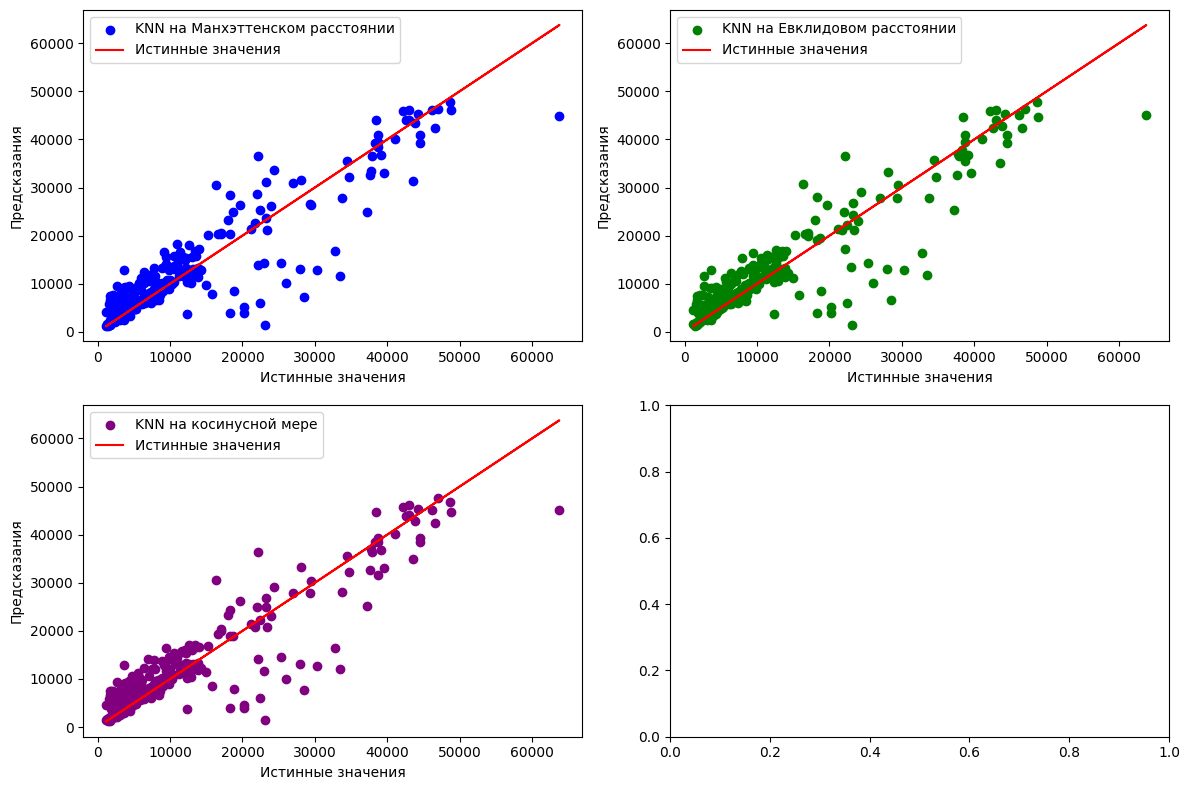

In [ ]:
import matplotlib.pyplot as plt

# Установки шрифта и размеров
plt.rc('font', size=10)
fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # Создаем 4 графика (2x2)

# Первый график: KNN с Манхэттенским расстоянием
axs[0, 0].scatter(y_test, pred_knn_m, label="KNN на Манхэттенском расстоянии", color="blue")
axs[0, 0].plot(y_test, y_test, label="Истинные значения", color="red")
axs[0, 0].set_xlabel("Истинные значения")
axs[0, 0].set_ylabel("Предсказания")
axs[0, 0].legend()

# Второй график: KNN с Евклидовым расстоянием
axs[0, 1].scatter(y_test, pred_knn_e, label="KNN на Евклидовом расстоянии", color="green")
axs[0, 1].plot(y_test, y_test, label="Истинные значения", color="red")
axs[0, 1].set_xlabel("Истинные значения")
axs[0, 1].set_ylabel("Предсказания")
axs[0, 1].legend()

# Третий график: KNN с косинусным расстоянием
axs[1, 0].scatter(y_test, pred_knn_c, label="KNN на косинусной мере", color="purple")
axs[1, 0].plot(y_test, y_test, label="Истинные значения", color="red")
axs[1, 0].set_xlabel("Истинные значения")
axs[1, 0].set_ylabel("Предсказания")
axs[1, 0].legend()

# Подгонка расстояния между графиками
plt.tight_layout()
plt.show()


При косинусной мере очень сильное сходство с моделью на основе Евклидового расстояния, но предсказания чуть плотнее к оси и с чуть меньшим разбросом.

### Гистограммы ошибок

Можно посмотреть, какие наиболее частные ошибки делает модель:

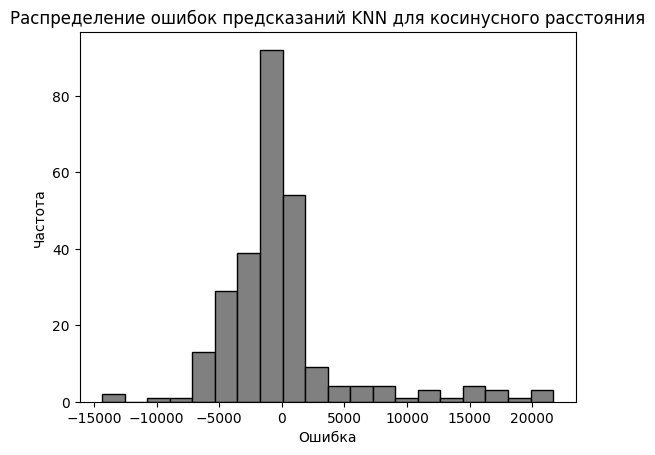

In [ ]:
errors = y_test - pred_knn_c
plt.hist(errors, bins=20, color='gray', edgecolor='black')
plt.xlabel('Ошибка')
plt.ylabel('Частота')
plt.title('Распределение ошибок предсказаний KNN для косинусного расстояния')
plt.show()


## Зависимости от количества соседей

MSE = 45053174.753; RMSE = 6712.166174381432; R2 = 0.71; MAE = 3532.372
MSE = 34004313.696; RMSE = 5831.32177950985; R2 = 0.781; MAE = 3345.143
MSE = 29658287.946; RMSE = 5445.942337780661; R2 = 0.809; MAE = 3330.89
MSE = 27048556.488; RMSE = 5200.822674200328; R2 = 0.826; MAE = 3154.493
MSE = 25690352.931; RMSE = 5068.565174773115; R2 = 0.835; MAE = 3045.707
MSE = 24402044.287; RMSE = 4939.8425366122665; R2 = 0.843; MAE = 3006.094
MSE = 23972377.379; RMSE = 4896.159451939638; R2 = 0.846; MAE = 2961.733
MSE = 24063103.953; RMSE = 4905.415777775238; R2 = 0.845; MAE = 3017.647
MSE = 24635397.271; RMSE = 4963.405813619696; R2 = 0.841; MAE = 3048.93
MSE = 24702445.482; RMSE = 4970.15547862416; R2 = 0.841; MAE = 3076.454
MSE = 24494034.122; RMSE = 4949.144786885492; R2 = 0.842; MAE = 3053.339
MSE = 25266360.649; RMSE = 5026.5654923164175; R2 = 0.837; MAE = 3140.24
MSE = 25819029.321; RMSE = 5081.242891328031; R2 = 0.834; MAE = 3196.273
MSE = 25948285.951; RMSE = 5093.946009810977; R2 = 0.83

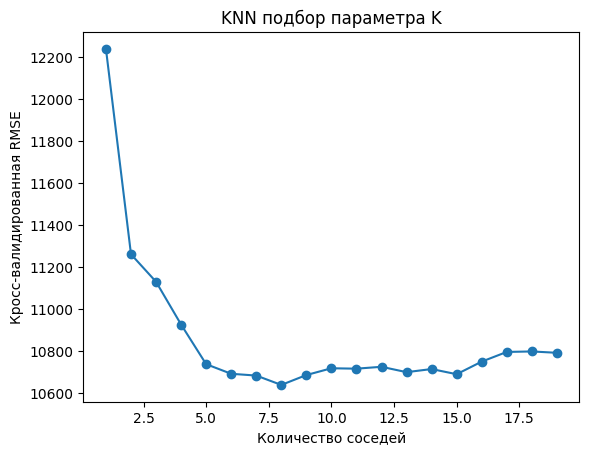

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score

# Перебор параметров
neighbors = range(1, 20)
scores = []

for n in neighbors:
    knn = KNeighborsRegressor(n_neighbors=n)
    pred, mse, rmse, _, _, knn_model = model_train_test(
    X_train_scaled,
    y_train,
    X_test_scaled,
    y_test,
    knn
)
    cv_scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
    scores.append(-np.mean(cv_scores))

# Визуализация
plt.plot(neighbors, scores, marker='o')
plt.xlabel('Количество соседей')
plt.ylabel('Кросс-валидированная RMSE')
plt.title('KNN подбор параметра K')
plt.show()


# KNN для классификации

## Биннинг целевой переменной

In [ ]:
X = df.drop('charges', axis = 1)
y = df[['charges']].copy()

# Расчет квартилей
q_labels = [0, 1, 2, 3]  # Названия для биннов
y = pd.qcut(y['charges'], q=4, labels=q_labels)

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
y.unique()

[3, 0, 1, 2]
Categories (4, int64): [0 < 1 < 2 < 3]

## Классификатор KNN

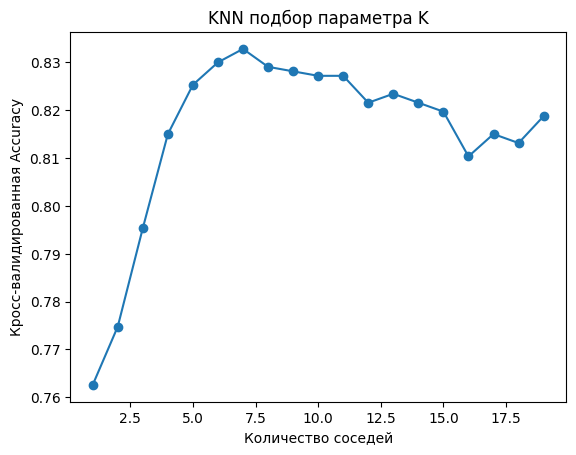

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Перебор параметров
neighbors = range(1, 20)
scores = []

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=3, scoring='accuracy')
    scores.append(np.mean(cv_scores))

# Визуализация
plt.plot(neighbors, scores, marker='o')
plt.xlabel('Количество соседей')
plt.ylabel('Кросс-валидированная Accuracy')
plt.title('KNN подбор параметра K')
plt.show()

## Обучение с выбранным k

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

## Получение метрик

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Прогнозирование
y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'F1: {f1}')
print(classification_report(y_test, y_pred))

Accuracy: 0.8097014925373134
F1: 0.8112665585801692
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        74
           1       0.67      0.90      0.77        59
           2       0.89      0.73      0.80        74
           3       0.86      0.79      0.82        61

    accuracy                           0.81       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.82      0.81      0.81       268

